In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/website-traffic.csv",parse_dates=['Date']).dropna()


In [4]:
data

,Date,traffic
0,2018-04-04,932
1,2018-05-04,929
2,2018-06-04,938
3,2018-07-04,964
4,2018-08-04,990
...,...,...
388,2019-04-27,4667
389,2019-04-28,4701
390,2019-04-29,4721
391,2019-04-30,4757


Text(0.5, 1.0, 'Plotting the Website Traffic')

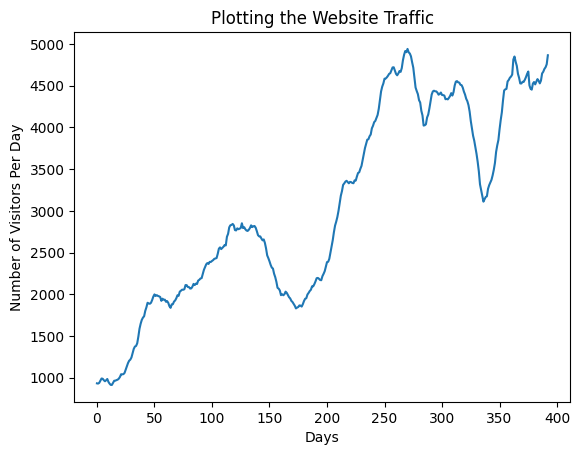

In [5]:
data['traffic'].plot()
plt.ylabel("Number of Visitors Per Day")
plt.xlabel("Days")
plt.title("Plotting the Website Traffic")

# **Seasonal Decompose**

By decomposing a time series into these four components, it is easier to analyze the data and identify the underlying patterns and trends. 


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

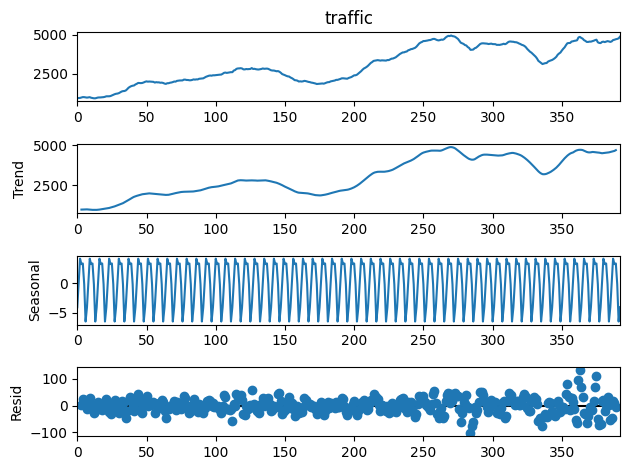

In [7]:
s =seasonal_decompose(data['traffic'],period=7)
s.plot();

In [28]:
size = int(len(data)*0.80)
training_data = data[:size]
testing_data = data[size:]

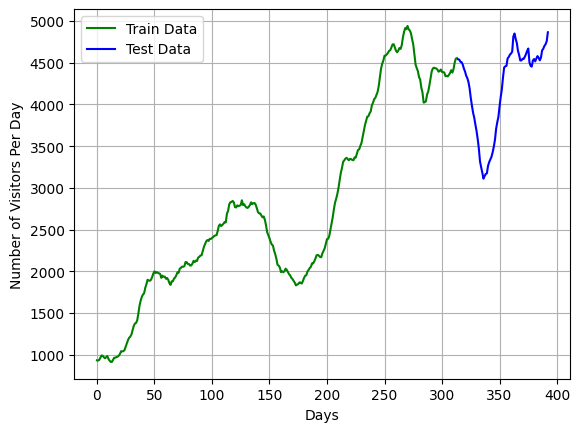

In [29]:
plt.grid(True)
plt.xlabel('Days')
plt.ylabel("Number of Visitors Per Day")
plt.plot(training_data['traffic'],'green',label = 'Train Data')
plt.plot(testing_data['traffic'],'blue',label = 'Test Data')
plt.legend()

**When a time series is stationary, it means that the statistical properties of the data do not change over time**

# CHECKING FOR STATIONARITY

There are several methods to determine stationarity in time series data, some of which are:

**1.Visual inspection:** Plotting the time series and examining it visually for any trend or seasonal patterns can provide an initial indication of stationarity.

**2. Using Statistical Plots :** Plots such as ACF and PACF can  be implemented to analyze and visualize time series data.

**3.Augmented Dickey-Fuller (ADF) test:** The ADF test is a statistical test that checks whether a time series is stationary or not. The test computes a test statistic and compares it to critical values to determine whether the null hypothesis of non-stationarity can be rejected.

# **1.Visual inspection:** 
By plotting the Traffic Column in dataset we can clearly note that the time series is not at all Stationary as the mean is not zero and also mean, variance change over time

# **2.Using Statistical Plots**

The **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** are important tools in time series analysis for understanding the properties of the data and determining the appropriate models to use for forecasting.


 **1. Autocorrelation Function (ACF)** 
The ACF measures the correlation between a time series and its lagged values. It helps to identify the presence of any repeating patterns or cycles in the data. 
A strong positive correlation at a specific lag indicates that the data is highly correlated with its past values at that lag, while a strong negative correlation indicates that the data is negatively correlated with its past values at that lag. The ACF can help to determine the order of an Autoregressive (AR) model.

**2. Partial Autocorrelation Function (PACF)**

The PACF, on the other hand, measures the correlation between a time series and its lagged values after removing the effect of the intervening lags. It helps to identify the presence of any direct or immediate relationships between the data and its past values.

A strong positive correlation at a specific lag indicates that the data is highly correlated with its past values at that lag after removing the effect of the intervening lags, while a strong negative correlation indicates that the data is negatively correlated with its past values at that lag after removing the effect of the intervening lags. The PACF can help to determine the order of a Moving Average (MA) model.

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

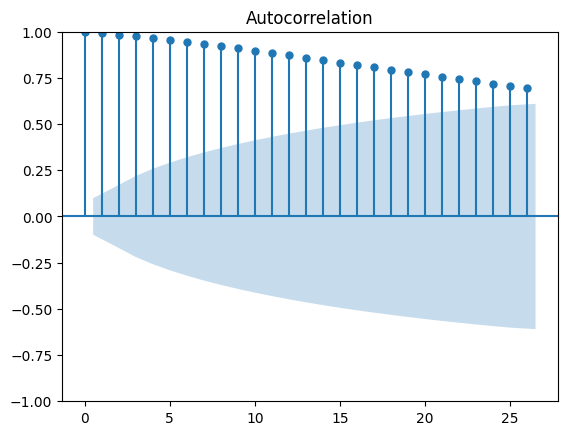

In [10]:
plot_acf(data['traffic']);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


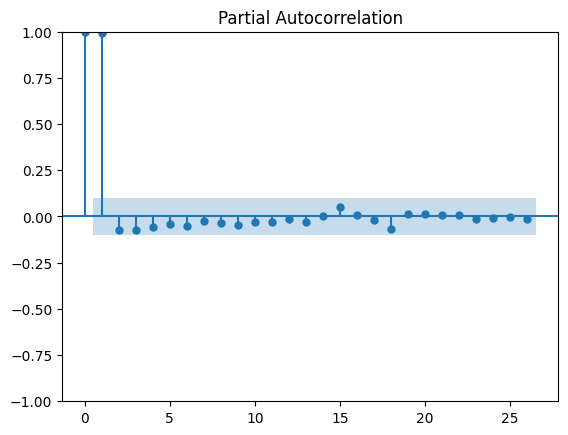

In [11]:
plot_pacf(data['traffic']);

These plots clearly denotes non - stationary in data

In general, a non-stationary time series will have an ACF plot that does not decay to zero, indicating the presence of autocorrelation at all lags. Similarly, the PACF plot will not exhibit a clear cutoff, indicating the presence of multiple significant lags. These patterns can make it difficult to determine the appropriate lag order for an AR or MA model.

It is important to note that ACF and PACF plots alone are not sufficient to determine the stationarity of a time series. Other methods such as the **Augmented Dickey-Fuller (ADF) test**  test should also be used to confirm the stationarity of the series.

# **3.Augmented Dickey-Fuller (ADF) test:**

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or not. The test is based on the null hypothesis that the time series has a unit root, which indicates that the series is non-stationary.

The ADF test computes a test statistic based on the coefficients of the regression equation, and compares it to critical values to determine whether the null hypothesis of non-stationarity can be rejected. If the test statistic is less than the critical value, the null hypothesis is rejected, and the time series is considered stationary.

In the ADF (Augmented Dickey-Fuller) test, the **p-value is the probability of obtaining a test statistic at least as extreme as the observed value, assuming that the null hypothesis of non-stationarity is true.**The p-value is used to determine the statistical significance of the test and whether the null hypothesis can be rejected.

If the** p-value** is less than a predetermined **level of significance (e.g., 0.05)**, the null hypothesis of **non-stationarity is rejected,** and the time series is considered stationary. Conversely, if the p-value is greater than the level of significance, the null hypothesis cannot be rejected, and the time series is considered non-stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adf_test = adfuller(data['traffic'])
adf_test

(-1.111374261838314,
 0.710514731518848,
 15,
 377,
 {'1%': -3.4478152097574224,
  '5%': -2.8692371153451903,
  '10%': -2.5708704003405356},
 3685.073215956844)

In [14]:
print("P-value for Checking Stationarity :",adf_test[1])

P-value for Checking Stationarity : 0.710514731518848


# HENCE  FROM ABOVE RESULTS THE TIME SERIES IS NOT STATIONARY

# To Make it Stationary we need to perform Differencing and have to feed it into Time Series Model

<Axes: >

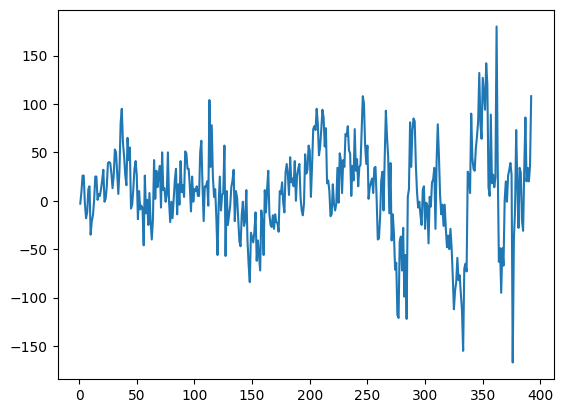

In [15]:
data_diff = data['traffic'].diff().dropna()
data_diff.plot()

In [16]:
data['traffic']

0       932
1       929
2       938
3       964
4       990
       ... 
388    4667
389    4701
390    4721
391    4757
392    4865
Name: traffic, Length: 393, dtype: int64

In [17]:
data_diff

1       -3.0
2        9.0
3       26.0
4       26.0
5       -3.0
       ...  
388     20.0
389     34.0
390     20.0
391     36.0
392    108.0
Name: traffic, Length: 392, dtype: float64

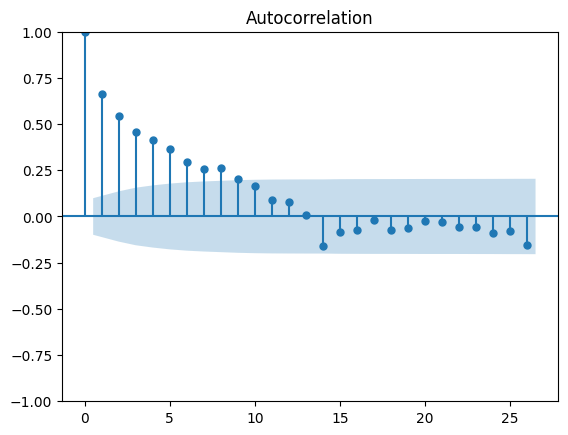

In [18]:
plot_acf(data_diff);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


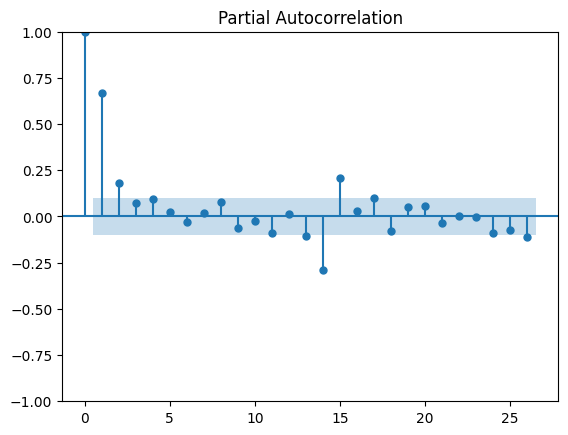

In [19]:
plot_pacf(data_diff);

In [20]:
adf_test_diff = adfuller(data_diff)
adf_test_diff

(-4.127085518282695,
 0.0008733590500152882,
 17,
 374,
 {'1%': -3.4479562840494475,
  '5%': -2.869299109917524,
  '10%': -2.57090345105665},
 3674.673737633481)

# Henceforth the model becomes Stationary 

Auto_arima is an **automated version of the ARIMA **(Autoregressive Integrated Moving Average) model selection process. It is a popular method for selecting the optimal order of the ARIMA model for a given time series dataset. Some advantages of using auto_arima include:

1.	**Automated model selection:** Auto_arima automates the process of selecting the **best ARIMA model by analyzing the time series data and selecting the optimal values of p, d, and q parameters**. This eliminates the need for manual selection, which can be time-consuming and error-prone.

2. The `pmdarima.auto_arima` function takes as input the time series data and a range of values for `p`, `d`, and `q` parameters, and returns an optimized ARIMA model. It uses a combination of iterative and seasonal algorithms to search for the best model.

3.  **Improved accuracy:** Auto_arima can select a more accurate model than a manual selection, as it searches over a wider range of possible models and selects the one with the lowest AIC (Akaike Information Criterion) value.

4.	**Flexible:** Auto_arima can handle both seasonal and non-seasonal time series data, making it a versatile model selection tool.


## Determining the p q d parameters uding autoarima

In [21]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.1 MB/s eta 0:00:00


In [22]:
import pmdarima as pm

In [24]:
auto_arima = pm.auto_arima(training_data['traffic'],seasonal=False,stepwise=False)

In [25]:
auto_arima

ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [26]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  314
Model:               SARIMAX(4, 1, 0)   Log Likelihood               -1487.670
Date:                Tue, 04 Apr 2023   AIC                           2987.340
Time:                        18:19:15   BIC                           3009.817
Sample:                             0   HQIC                          2996.322
                                - 314                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8102      1.607      1.748      0.080      -0.340       5.961
ar.L1          0.4955      0.052      9.550      0.000       0.394       0.597
ar.L2          0.2103      0.058      3.613      0.000       0.096       0.324
ar.L3         -0.0692      0.059     -1.180      0.238      -0.184       0.046
ar.L4          0.1206      0.058      2.083      0.037       0.007       0.234
sigma2       785.0360     59.655     13.160      0.000     668.114     901.958
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.91   Prob(JB):                         0.57
Heteroskedasticity (H):               2.20   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(4,1,0) is a type of time series model that stands for AutoRegressive Integrated Moving Average. It is characterized by the following parameters:

**p=4:** The number of autoregressive (AR) terms. This means that the model uses the values of the series from the previous four time periods to predict the current value.

**d=1**: The degree of differencing. This means that the model uses the first difference of the series (i.e., the difference between consecutive observations) to make it stationary.

q=0: The number of moving average (MA) terms. This means that the model does not use the moving average terms to predict the current value.

In [30]:
arima_fit = auto_arima.fit(training_data['traffic'])

# **ARIMA(4,1,0)**

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
arima = ARIMA(training_data['traffic'], order=(4,1,0))
arima_fit = arima.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  314
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1489.107
Date:                Tue, 04 Apr 2023   AIC                           2988.215
Time:                        18:22:19   BIC                           3006.946
Sample:                             0   HQIC                          2995.700
                                - 314                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5058      0.051      9.866      0.000       0.405       0.606
ar.L2          0.2153      0.058      3.718      0.000       0.102       0.329
ar.L3         -0.0647      0.058     -1.106      0.2

In [35]:
forecast_test = arima_fit.forecast(len(testing_data))

In [36]:
pred = pd.DataFrame(forecast_test)

In [37]:
pred

,predicted_mean
314,4568.341149
315,4583.548311
316,4599.798238
317,4611.204267
318,4621.212587
...,...
388,4686.843641
389,4686.844032
390,4686.844371
391,4686.844665


<Axes: >

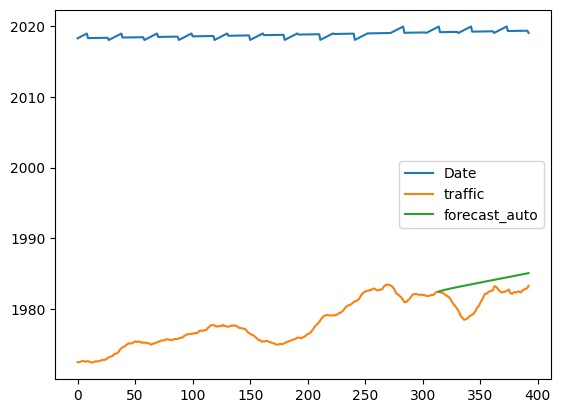

In [38]:
forecast_test_auto = auto_arima.predict(n_periods=len(testing_data))
data['forecast_auto'] = [None]*len(training_data) + list(forecast_test_auto)

data.plot()